In [10]:
import matplotlib.pyplot as plt
import pandas as pd 
data = pd.read_csv("data/netflix_results.csv") 

In [11]:
# Preview the first 5 lines of the loaded data 
data.head()

,frame.number,frame.time_relative,frame.len,wlan_radio.phy,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.data_rate,wlan_radio.duration,wlan.fc.type_subtype,wlan.fc.type,wlan.fc.subtype,wlan.duration,wlan.fc.ds,wlan.fc.retry,wlan.fcs.status,wlan.qos.priority,data.len
0,1,0.000000,68,6,2412,-25.0,24.0,32,25,1,9,0,0x00000000,0,1,NaN,NaN
1,2,0.001863,56,6,2412,-26.0,24.0,28,27,1,11,158,0x00000000,0,1,NaN,NaN
2,3,0.001871,50,6,2412,-40.0,24.0,28,28,1,12,114,0x00000000,0,1,NaN,NaN
3,4,0.001874,68,6,2412,-41.0,24.0,32,25,1,9,0,0x00000000,0,1,NaN,NaN
4,5,0.004888,56,6,2412,-40.0,24.0,28,27,1,11,1724,0x00000000,0,1,NaN,NaN


In [12]:
#Number of Packets in captured Session
data['frame.number'].count()

222070

In [13]:
print('The largest frame that was captured: ', data['frame.len'].max(), ' bytes')
print('The smallest frame that was captured: ', data['frame.len'].min(), ' bytes')
print('The lowest radio signal strength: ', data['wlan_radio.signal_dbm'].max(),' dBm')
print('The highest radio signal strength: ', data['wlan_radio.signal_dbm'].min(),' dBm')

The largest frame that was captured:  1593  bytes
The smallest frame that was captured:  50  bytes
The lowest radio signal strength:  -19.0  dBm
The highest radio signal strength:  -97.0  dBm


In [14]:
# How many Packets are there for each Frame Type?
data['wlan.fc.type'].value_counts()

1    150842
0     41259
2     29969
Name: wlan.fc.type, dtype: int64

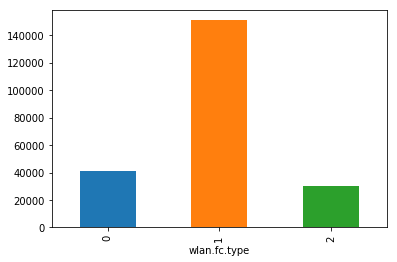

In [16]:
#Plot the distribution:
data.groupby('wlan.fc.type')['frame.number'].nunique().plot(kind='bar')
plt.show()

In [6]:
# How many Packets are there for each SubFrame Type?
data['wlan.fc.subtype'].value_counts()

9     48416
11    47173
8     45902
12    40328
4     21022
13    13218
5      3969
0      1690
14      352
Name: wlan.fc.subtype, dtype: int64

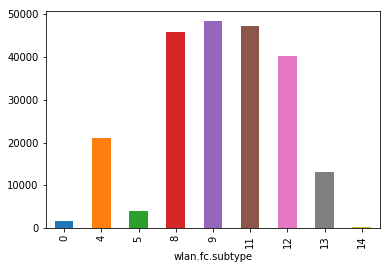

In [17]:
#Plot the distribution:
data.groupby('wlan.fc.subtype')['frame.number'].nunique().plot(kind='bar')
plt.show()

In [7]:
#Which direction does the data flow (number of Packets)?
data['wlan.fc.ds'].value_counts()

0x00000000    192101
0x00000001     22622
0x00000002      7347
Name: wlan.fc.ds, dtype: int64

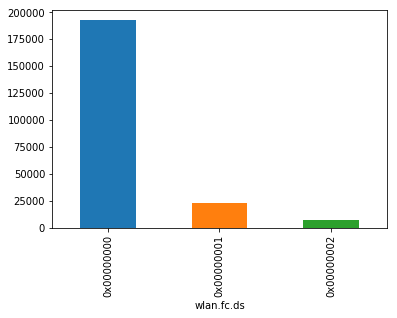

In [18]:
#Plot the distribution:
data.groupby('wlan.fc.ds')['frame.number'].nunique().plot(kind='bar')
plt.show()

In [8]:
#What QoS does the data flows have?
data['wlan.qos.priority'].value_counts()

0.0    6492
6.0    1067
4.0       6
5.0       3
2.0       2
Name: wlan.qos.priority, dtype: int64

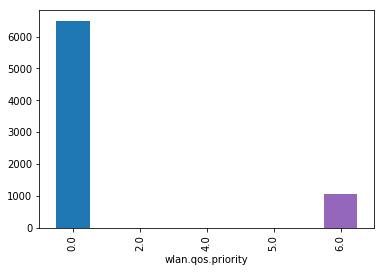

In [19]:
#Plot the distribution:
data.groupby('wlan.qos.priority')['frame.number'].nunique().plot(kind='bar')
plt.show()

In [23]:
#Max data transferred in a packet(bytes)
data['data.len'].max()

1516.0

In [24]:
#Min data transferred in a packet(bytes)
data['data.len'].min()

44.0

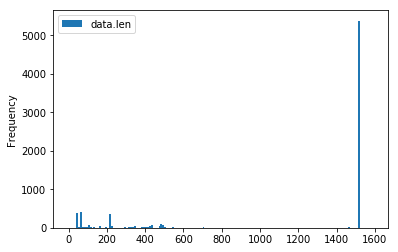

In [30]:
#Plot the distribution of data length (bytes):
bin1 = [i for i in range(0,1600,10)]
data[['data.len']].plot(kind='hist',bins=bin1,rwidth=5)
plt.show()